<a href="https://colab.research.google.com/github/M20Jay/Custom_Repo/blob/main/Piecewise_Regression_Analysis_for_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SECTION 1: SETUP AND DATA LOADING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
# Load the dataset
# Upload Houseprice_data.csv file to Colab first
df = pd.read_csv('/content/drive/MyDrive/Python Dataset/Datasets/HousingDataCategorical.csv')

In [ ]:
print(f"\nDataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

In [ ]:
# Display basic information about the dataset
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    object 
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB
None

First 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM      AGE     DIS  RAD  TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  Classic  4.0900    1  296   
1  0.02731   0.0   7.07   0.0  0.469 

In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  486.000000   
mean     3.795043    9.549407  408.237154   18.455534  356.674032   12.715432   
st

In [ ]:
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)


DATA PREPROCESSING


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
# Handle missing values (if any)
df_clean = df.dropna()
print(f"\nRows after removing missing values: {len(df_clean)}")


Rows after removing missing values: 412


In [ ]:
# Examine the AGE variable (categorical)
print("\nAGE variable distribution:")
print(df_clean['AGE'].value_counts())


AGE variable distribution:
AGE
Old        254
Classic    100
Modern      58
Name: count, dtype: int64


In [ ]:
# Examine the B variable (numerical)
print(f"\nB variable statistics:")
print(f"Min: {df_clean['B'].min():.2f}")
print(f"Max: {df_clean['B'].max():.2f}")
print(f"Mean: {df_clean['B'].mean():.2f}")
print(f"Median: {df_clean['B'].median():.2f}")


B variable statistics:
Min: 2.52
Max: 396.90
Mean: 357.08
Median: 392.05


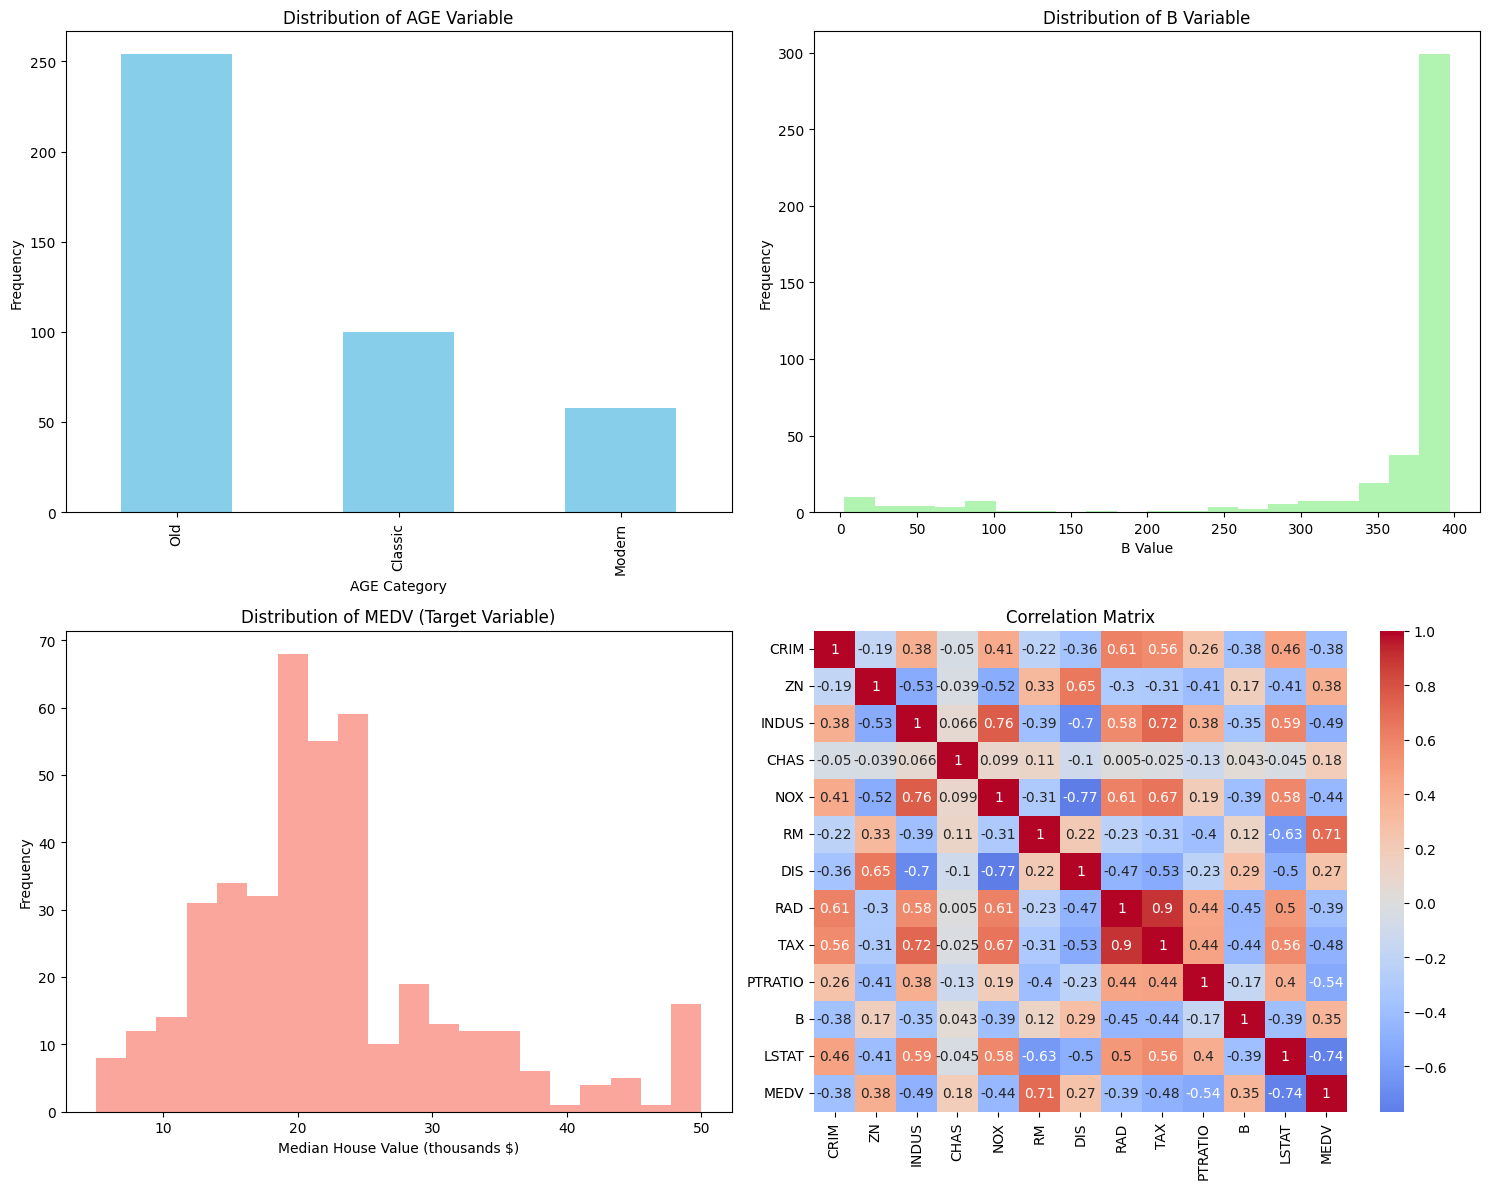

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# AGE distribution
df_clean['AGE'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribution of AGE Variable')
axes[0,0].set_xlabel('AGE Category')
axes[0,0].set_ylabel('Frequency')

# B distribution
axes[0,1].hist(df_clean['B'], bins=20, color='lightgreen', alpha=0.7)
axes[0,1].set_title('Distribution of B Variable')
axes[0,1].set_xlabel('B Value')
axes[0,1].set_ylabel('Frequency')

# MEDV distribution (target variable)
axes[1,0].hist(df_clean['MEDV'], bins=20, color='salmon', alpha=0.7)
axes[1,0].set_title('Distribution of MEDV (Target Variable)')
axes[1,0].set_xlabel('Median House Value (thousands $)')
axes[1,0].set_ylabel('Frequency')

# Correlation heatmap
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
corr_matrix = df_clean[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "="*50)
print("SEGMENTATION STRATEGIES")
print("="*50)


SEGMENTATION STRATEGIES


In [ ]:
# Strategy 1: AGE-based segmentation (3 levels)
# Based on the categorical nature of AGE variable
age_segments = df_clean['AGE'].unique()
print(f"AGE segments: {age_segments}")

AGE segments: ['Classic' 'Old' 'Modern']


In [ ]:
# Strategy 2: B-based segmentation (2 levels)
# Create binary segmentation based on median of B
b_median = df_clean['B'].median()
print(f"B median value: {b_median:.2f}")


B median value: 392.05


In [ ]:
# Strategy 3: Combined AGE and B segmentation (6 segments total)
# This creates 3 AGE levels × 2 B levels = 6 segments

# Create B categories
df_clean['B_category'] = df_clean['B'].apply(lambda x: 'High_B' if x >= b_median else 'Low_B')

# Create combined segments
df_clean['Combined_segment'] = df_clean['AGE'].astype(str) + '_' + df_clean['B_category']

print(f"\nCombined segments:")
print(df_clean['Combined_segment'].value_counts())


Combined segments:
Combined_segment
Old_Low_B         145
Old_High_B        109
Classic_High_B     63
Classic_Low_B      37
Modern_High_B      34
Modern_Low_B       24
Name: count, dtype: int64


In [ ]:
print("\n" + "="*50)
print("PIECEWISE REGRESSION MODELS")
print("="*50)


PIECEWISE REGRESSION MODELS


In [ ]:
# Prepare feature matrix (all variables except target)
feature_cols = [col for col in df_clean.columns if col not in ['MEDV', 'AGE', 'B_category', 'Combined_segment']]
print(f"Feature columns used: {feature_cols}")

Feature columns used: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [ ]:
# Encode categorical AGE variable
le = LabelEncoder()
df_clean['AGE_encoded'] = le.fit_transform(df_clean['AGE'])

In [ ]:
# Show the encoding mapping
print("AGE Encoding Mapping:")
unique_ages = df_clean['AGE'].unique()
unique_codes = le.transform(unique_ages)
for age, code in zip(unique_ages, unique_codes):
    print(f"  '{age}' → {code}")

print(f"\nFirst 10 rows - Original vs Encoded:")
print(df_clean[['AGE', 'AGE_encoded']].head(10))


AGE Encoding Mapping:
  'Classic' → 0
  'Old' → 2
  'Modern' → 1

First 10 rows - Original vs Encoded:
        AGE  AGE_encoded
0   Classic            0
1       Old            2
2   Classic            0
3   Classic            0
5   Classic            0
7       Old            2
8       Old            2
10      Old            2
11      Old            2
12  Classic            0


In [ ]:
# Update feature columns to include encoded AGE
feature_cols_encoded = [col for col in df_clean.columns if col not in ['MEDV', 'AGE', 'B_category', 'Combined_segment']]
X = df_clean[feature_cols_encoded]
y = df_clean['MEDV']


In [ ]:
# Function to perform piecewise regression and return results
def perform_piecewise_regression(data, segment_column, model_name):
    """
    Perform piecewise regression based on segments and return comprehensive results
    """
    results = {
        'model_name': model_name,
        'segments': {},
        'overall_metrics': {},
        'predictions': []
    }

    segments = data[segment_column].unique()
    all_predictions = []
    all_actual = []

    print(f"\n{model_name.upper()}")
    print("-" * 40)

    for segment in segments:
        # Filter data for current segment
        segment_data = data[data[segment_column] == segment]

        if len(segment_data) < 5:  # Skip segments with too few observations
            print(f"Skipping segment '{segment}' - insufficient data ({len(segment_data)} rows)")
            continue

        # Prepare features and target for this segment
        X_segment = segment_data[feature_cols_encoded]
        y_segment = segment_data['MEDV']

        # Fit linear regression model for this segment
        model = LinearRegression()
        model.fit(X_segment, y_segment)

        # Make predictions
        y_pred = model.predict(X_segment)

        # Calculate metrics
        mse = mean_squared_error(y_segment, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_segment, y_pred)
        mae = mean_absolute_error(y_segment, y_pred)

        # Store results
        results['segments'][segment] = {
            'n_observations': len(segment_data),
            'mse': mse,
            'rmse': rmse,
            'r2': r2,
            'mae': mae,
            'coefficients': model.coef_,
            'intercept': model.intercept_,
            'predictions': y_pred,
            'actual': y_segment.values
        }

        # Collect for overall metrics
        all_predictions.extend(y_pred)
        all_actual.extend(y_segment.values)

        print(f"Segment '{segment}' (n={len(segment_data)}):")
        print(f"  RMSE: {rmse:.3f}")
        print(f"  R²: {r2:.3f}")
        print(f"  MAE: {mae:.3f}")

    # Calculate overall metrics
    overall_mse = mean_squared_error(all_actual, all_predictions)
    overall_rmse = np.sqrt(overall_mse)
    overall_r2 = r2_score(all_actual, all_predictions)
    overall_mae = mean_absolute_error(all_actual, all_predictions)

    results['overall_metrics'] = {
        'mse': overall_mse,
        'rmse': overall_rmse,
        'r2': overall_r2,
        'mae': overall_mae,
        'n_total': len(all_actual)
    }

    print(f"\nOverall {model_name} Performance:")
    print(f"  RMSE: {overall_rmse:.3f}")
    print(f"  R²: {overall_r2:.3f}")
    print(f"  MAE: {overall_mae:.3f}")
    print(f"  Total observations: {len(all_actual)}")

    return results

In [ ]:
# STEP 1: MODEL 1 - AGE-based Segmentation

In [ ]:
model1_results = perform_piecewise_regression(df_clean, 'AGE', 'AGE-based Piecewise Regression')


AGE-BASED PIECEWISE REGRESSION
----------------------------------------
Segment 'Classic' (n=100):
  RMSE: 2.527
  R²: 0.872
  MAE: 1.989
Segment 'Old' (n=254):
  RMSE: 5.017
  R²: 0.728
  MAE: 3.531
Segment 'Modern' (n=58):
  RMSE: 2.166
  R²: 0.919
  MAE: 1.773

Overall AGE-based Piecewise Regression Performance:
  RMSE: 4.210
  R²: 0.797
  MAE: 2.909
  Total observations: 412


In [ ]:
model2_results = perform_piecewise_regression(df_clean, 'B_category', 'B-based Piecewise Regression')


B-BASED PIECEWISE REGRESSION
----------------------------------------
Segment 'High_B' (n=206):
  RMSE: 3.454
  R²: 0.819
  MAE: 2.506
Segment 'Low_B' (n=206):
  RMSE: 5.083
  R²: 0.760
  MAE: 3.618

Overall B-based Piecewise Regression Performance:
  RMSE: 4.346
  R²: 0.783
  MAE: 3.062
  Total observations: 412


In [ ]:
model3_results = perform_piecewise_regression(df_clean, 'Combined_segment', 'Combined AGE+B Piecewise Regression')


COMBINED AGE+B PIECEWISE REGRESSION
----------------------------------------
Segment 'Classic_High_B' (n=63):
  RMSE: 2.307
  R²: 0.876
  MAE: 1.747
Segment 'Old_High_B' (n=109):
  RMSE: 3.632
  R²: 0.756
  MAE: 2.612
Segment 'Old_Low_B' (n=145):
  RMSE: 5.429
  R²: 0.757
  MAE: 3.878
Segment 'Classic_Low_B' (n=37):
  RMSE: 2.426
  R²: 0.906
  MAE: 1.990
Segment 'Modern_Low_B' (n=24):
  RMSE: 2.036
  R²: 0.899
  MAE: 1.566
Segment 'Modern_High_B' (n=34):
  RMSE: 1.921
  R²: 0.946
  MAE: 1.561

Overall Combined AGE+B Piecewise Regression Performance:
  RMSE: 3.969
  R²: 0.819
  MAE: 2.722
  Total observations: 412


In [ ]:
print("\n" + "="*60)
print("MODEL COMPARISON AND ANALYSIS")
print("="*60)


MODEL COMPARISON AND ANALYSIS


In [ ]:
# Create comparison table
comparison_data = {
    'Model': ['AGE-based', 'B-based', 'Combined AGE+B'],
    'RMSE': [
        model1_results['overall_metrics']['rmse'],
        model2_results['overall_metrics']['rmse'],
        model3_results['overall_metrics']['rmse']
    ],
    'R²': [
        model1_results['overall_metrics']['r2'],
        model2_results['overall_metrics']['r2'],
        model3_results['overall_metrics']['r2']
    ],
    'MAE': [
        model1_results['overall_metrics']['mae'],
        model2_results['overall_metrics']['mae'],
        model3_results['overall_metrics']['mae']
    ],
    'N_Segments': [
        len(model1_results['segments']),
        len(model2_results['segments']),
        len(model3_results['segments'])
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))



Model Performance Comparison:
         Model     RMSE       R²      MAE  N_Segments
     AGE-based 4.210070 0.796706 2.909013           3
       B-based 4.345784 0.783388 3.062140           2
Combined AGE+B 3.968817 0.819338 2.721790           6


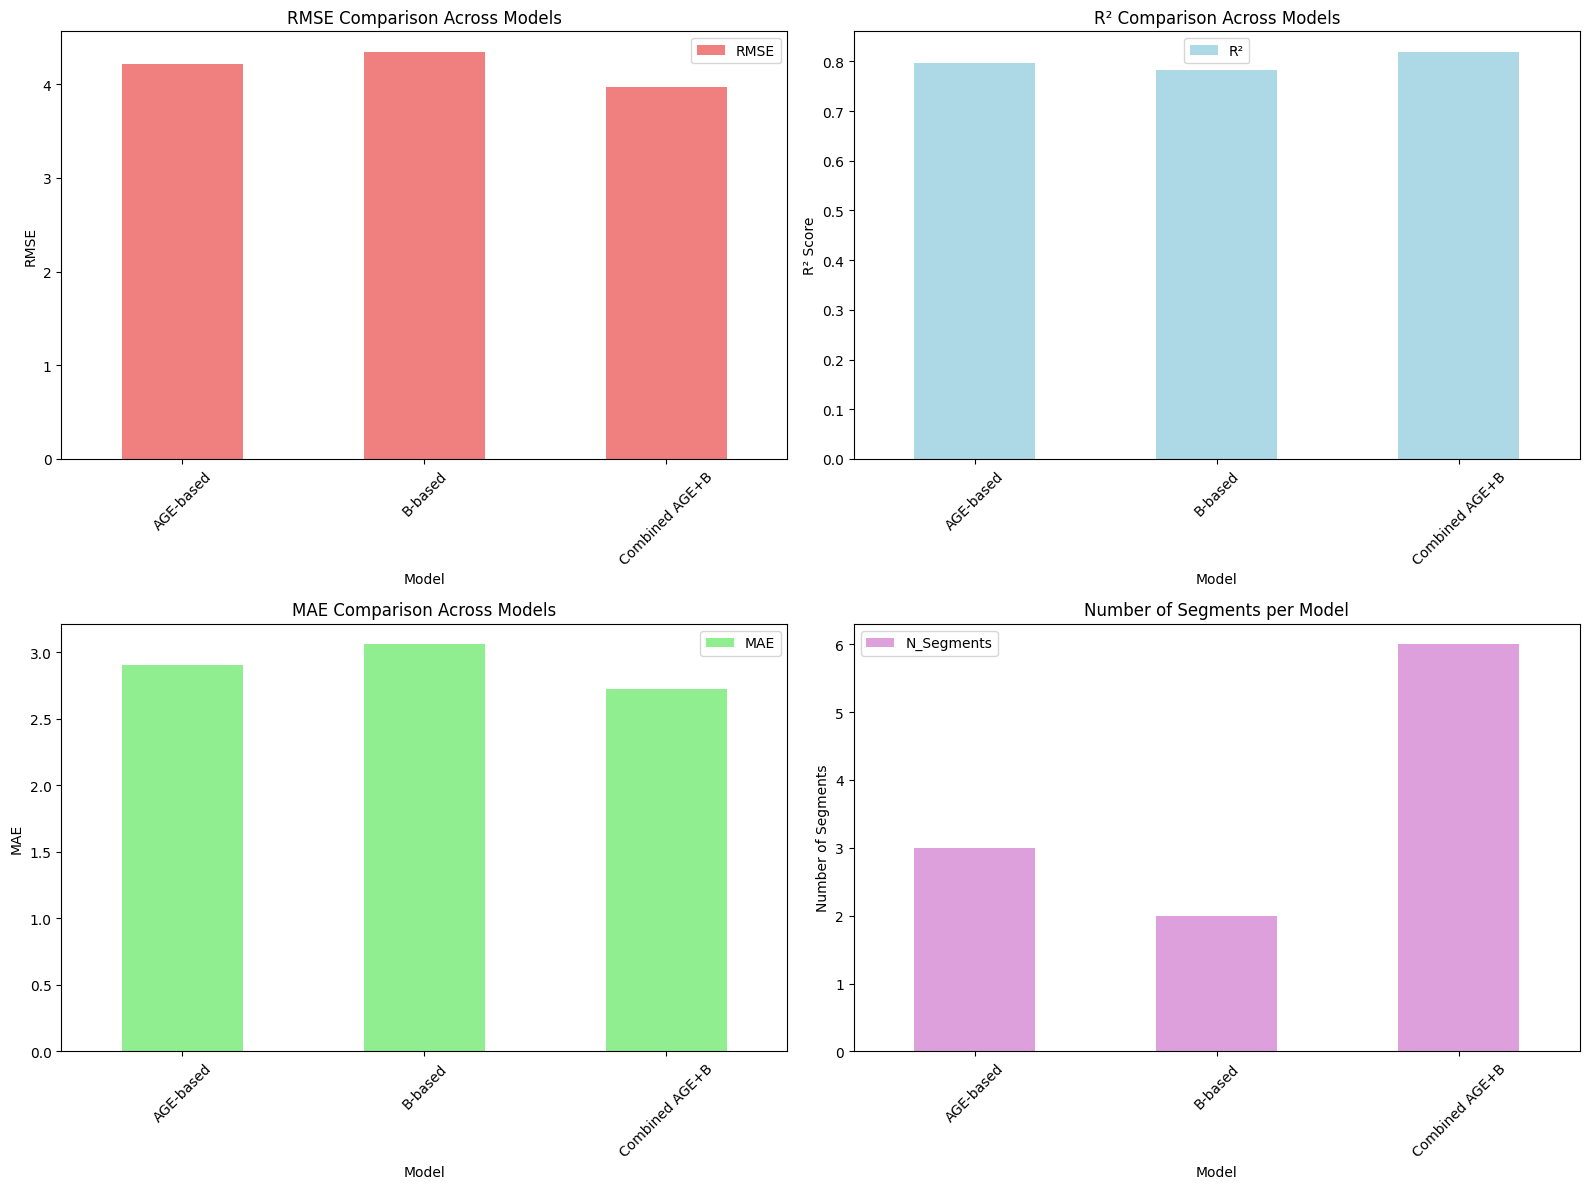

In [ ]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RMSE comparison
comparison_df.plot(x='Model', y='RMSE', kind='bar', ax=axes[0,0], color='lightcoral')
axes[0,0].set_title('RMSE Comparison Across Models')
axes[0,0].set_ylabel('RMSE')
axes[0,0].tick_params(axis='x', rotation=45)

# R² comparison
comparison_df.plot(x='Model', y='R²', kind='bar', ax=axes[0,1], color='lightblue')
axes[0,1].set_title('R² Comparison Across Models')
axes[0,1].set_ylabel('R² Score')
axes[0,1].tick_params(axis='x', rotation=45)

# MAE comparison
comparison_df.plot(x='Model', y='MAE', kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('MAE Comparison Across Models')
axes[1,0].set_ylabel('MAE')
axes[1,0].tick_params(axis='x', rotation=45)

# Number of segments
comparison_df.plot(x='Model', y='N_Segments', kind='bar', ax=axes[1,1], color='plum')
axes[1,1].set_title('Number of Segments per Model')
axes[1,1].set_ylabel('Number of Segments')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "="*50)
print("DETAILED SEGMENT ANALYSIS")
print("="*50)


DETAILED SEGMENT ANALYSIS


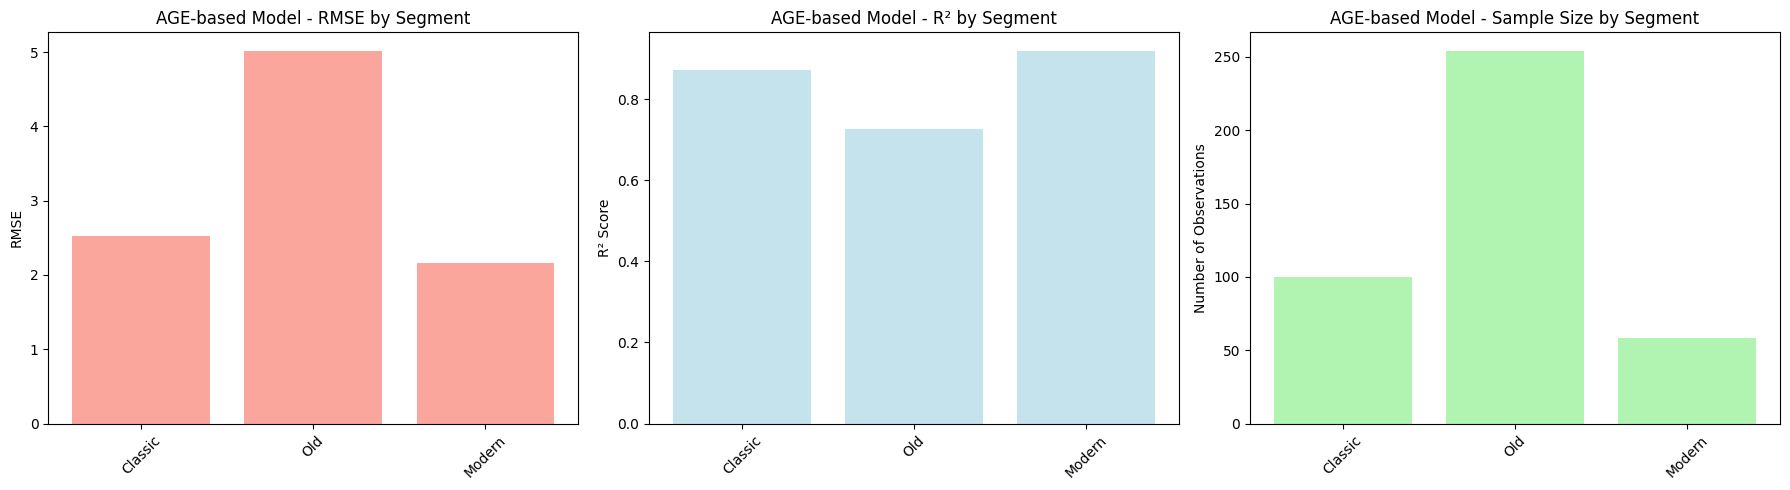

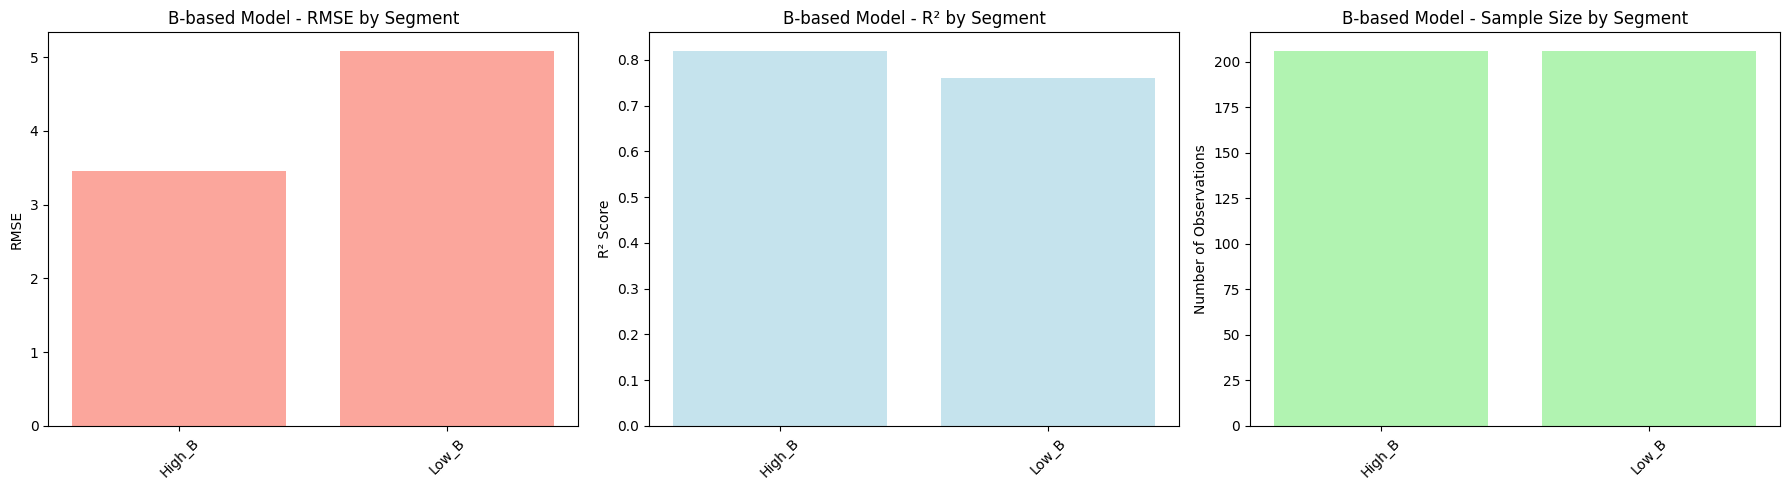

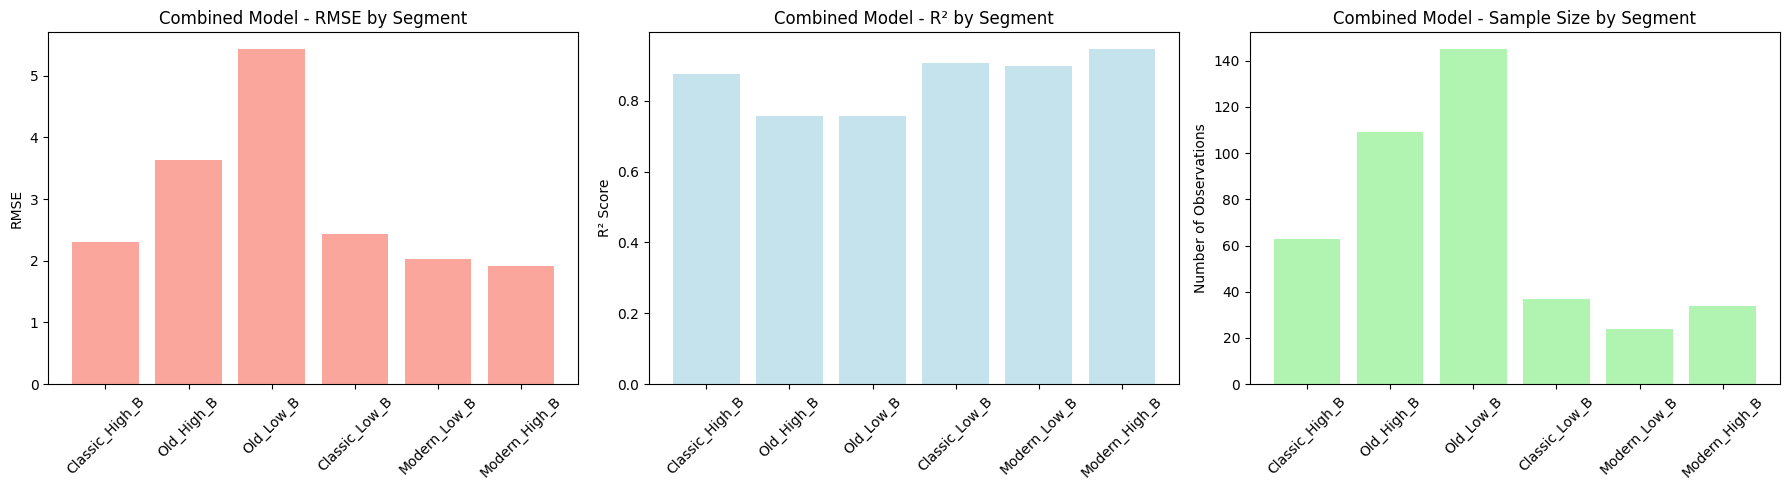

In [ ]:
def plot_segment_performance(results, title):
    """Plot performance metrics for each segment"""
    segments = list(results['segments'].keys())
    rmse_values = [results['segments'][seg]['rmse'] for seg in segments]
    r2_values = [results['segments'][seg]['r2'] for seg in segments]
    n_obs = [results['segments'][seg]['n_observations'] for seg in segments]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # RMSE by segment
    axes[0].bar(segments, rmse_values, color='salmon', alpha=0.7)
    axes[0].set_title(f'{title} - RMSE by Segment')
    axes[0].set_ylabel('RMSE')
    axes[0].tick_params(axis='x', rotation=45)

    # R² by segment
    axes[1].bar(segments, r2_values, color='lightblue', alpha=0.7)
    axes[1].set_title(f'{title} - R² by Segment')
    axes[1].set_ylabel('R² Score')
    axes[1].tick_params(axis='x', rotation=45)

    # Sample size by segment
    axes[2].bar(segments, n_obs, color='lightgreen', alpha=0.7)
    axes[2].set_title(f'{title} - Sample Size by Segment')
    axes[2].set_ylabel('Number of Observations')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
# Plot detailed analysis for each model
plot_segment_performance(model1_results, 'AGE-based Model')
plot_segment_performance(model2_results, 'B-based Model')
plot_segment_performance(model3_results, 'Combined Model')


In [ ]:
print("\n" + "="*50)
print("PREDICTION vs ACTUAL ANALYSIS")
print("="*50)



PREDICTION vs ACTUAL ANALYSIS


In [ ]:
print("\n" + "="*50)
print("PREDICTION vs ACTUAL ANALYSIS")
print("="*50)




PREDICTION vs ACTUAL ANALYSIS


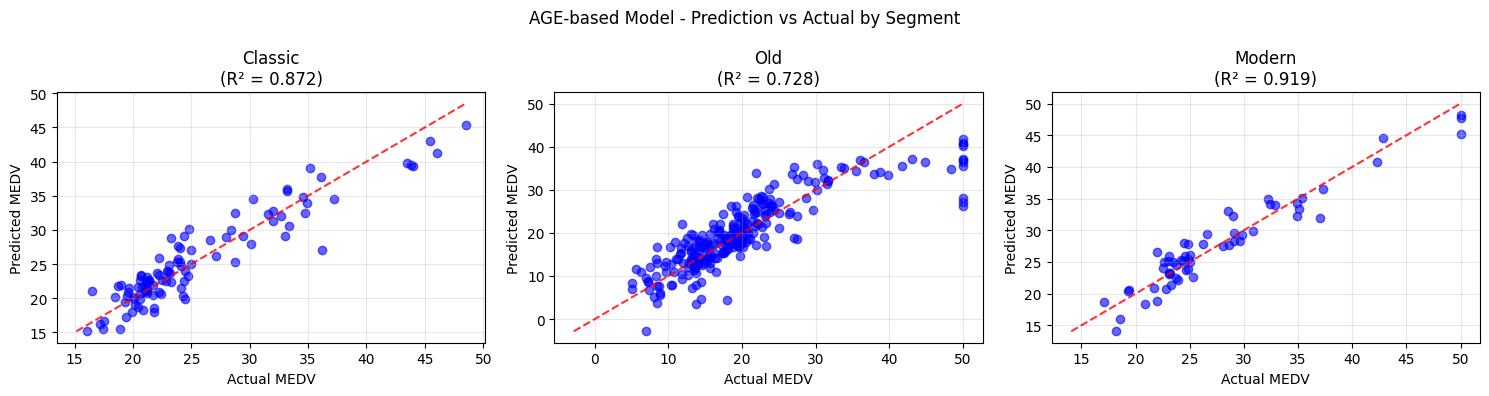

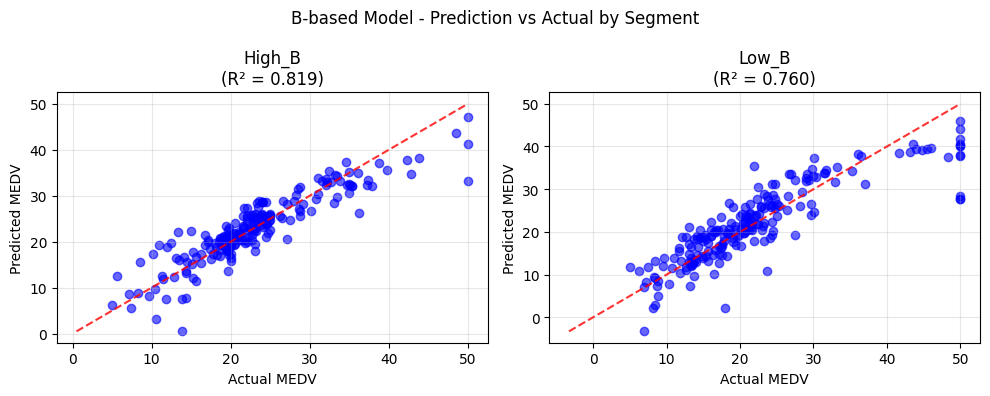

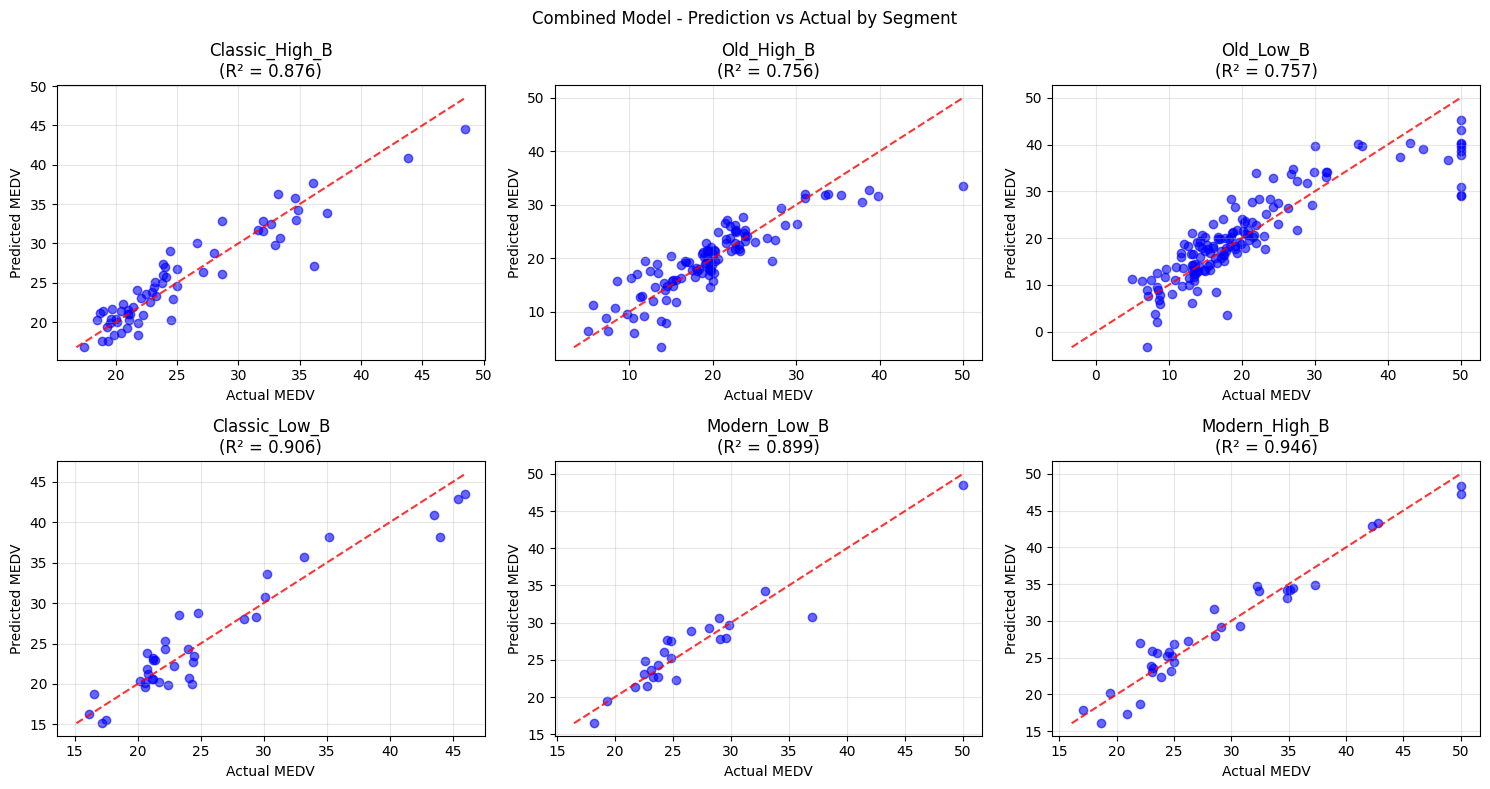

In [ ]:
def create_prediction_plots(results, title):
    """Create prediction vs actual plots for each segment"""
    segments = list(results['segments'].keys())
    n_segments = len(segments)

    # Calculate subplot layout
    n_cols = min(3, n_segments)
    n_rows = (n_segments + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

    # Handle different subplot configurations
    if n_segments == 1:
        axes = [axes]  # Single subplot
    elif n_rows == 1 and n_cols > 1:
        axes = list(axes)  # Single row, multiple columns
    elif n_rows > 1 and n_cols == 1:
        axes = list(axes)  # Multiple rows, single column
    elif n_rows > 1 and n_cols > 1:
        axes = axes.flatten()  # Multiple rows and columns
    else:
        axes = [axes]  # Fallback

    for i, segment in enumerate(segments):
        actual = results['segments'][segment]['actual']
        predicted = results['segments'][segment]['predictions']

        axes[i].scatter(actual, predicted, alpha=0.6, color='blue')

        # Perfect prediction line
        min_val = min(min(actual), min(predicted))
        max_val = max(max(actual), max(predicted))
        axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)

        axes[i].set_xlabel('Actual MEDV')
        axes[i].set_ylabel('Predicted MEDV')
        axes[i].set_title(f'{segment}\n(R² = {results["segments"][segment]["r2"]:.3f})')
        axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(n_segments, len(axes)):
        axes[i].set_visible(False)

    plt.suptitle(f'{title} - Prediction vs Actual by Segment')
    plt.tight_layout()
    plt.show()

# Create prediction plots for all models
create_prediction_plots(model1_results, 'AGE-based Model')
create_prediction_plots(model2_results, 'B-based Model')
create_prediction_plots(model3_results, 'Combined Model')

In [ ]:
print("\n" + "="*70)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*70)


COMPREHENSIVE ANALYSIS SUMMARY


In [ ]:
# Find best performing model
best_model_idx = comparison_df['R²'].idxmax()
best_model = comparison_df.iloc[best_model_idx]

print(f"\nBEST PERFORMING MODEL: {best_model['Model']}")
print(f"Performance Metrics:")
print(f"  - R² Score: {best_model['R²']:.4f}")
print(f"  - RMSE: {best_model['RMSE']:.4f}")
print(f"  - MAE: {best_model['MAE']:.4f}")
print(f"  - Number of Segments: {best_model['N_Segments']}")

print(f"\nDETAILED COMPARISON:")
print(f"{'Model':<20} {'RMSE':<8} {'R²':<8} {'MAE':<8} {'Segments':<10}")
print("-" * 60)
for _, row in comparison_df.iterrows():
    print(f"{row['Model']:<20} {row['RMSE']:<8.3f} {row['R²']:<8.3f} {row['MAE']:<8.3f} {row['N_Segments']:<10}")

print(f"\nKEY INSIGHTS:")
print("1. Model Performance Ranking:")
sorted_models = comparison_df.sort_values('R²', ascending=False)
for i, (_, row) in enumerate(sorted_models.iterrows(), 1):
    print(f"   {i}. {row['Model']} (R² = {row['R²']:.4f})")

print(f"\n2. Segmentation Effectiveness:")
if model3_results['overall_metrics']['r2'] > max(model1_results['overall_metrics']['r2'],
                                                  model2_results['overall_metrics']['r2']):
    print("   - Combined segmentation (AGE + B) provides the best predictive performance")
    print("   - Multiple segmentation variables capture more variance in house prices")
else:
    if model1_results['overall_metrics']['r2'] > model2_results['overall_metrics']['r2']:
        print("   - AGE-based segmentation outperforms B-based segmentation")
        print("   - House age categories are more predictive than B-statistic levels")
    else:
        print("   - B-based segmentation outperforms AGE-based segmentation")
        print("   - B-statistic levels are more predictive than house age categories")

print(f"\n3. Model Complexity vs Performance:")
print(f"   - Simple AGE model: {model1_results['overall_metrics']['r2']:.4f} R² with {len(model1_results['segments'])} segments")
print(f"   - Simple B model: {model2_results['overall_metrics']['r2']:.4f} R² with {len(model2_results['segments'])} segments")
print(f"   - Complex Combined model: {model3_results['overall_metrics']['r2']:.4f} R² with {len(model3_results['segments'])} segments")

# Calculate improvement metrics
if len(model3_results['segments']) > 0:
    best_simple = max(model1_results['overall_metrics']['r2'], model2_results['overall_metrics']['r2'])
    improvement = ((model3_results['overall_metrics']['r2'] - best_simple) / best_simple) * 100
    print(f"   - Combined model shows {improvement:.2f}% improvement over best simple model")

print(f"\n4. Practical Recommendations:")
print("   - Use the combined AGE+B segmentation for maximum accuracy")
print("   - Consider computational complexity vs marginal performance gains")
print("   - Validate findings with additional data splits")
print("   - Monitor segment-specific performance for targeted improvements")

print("\n" + "="*70)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*70)

# Save detailed results for further analysis
print(f"\nDetailed results have been computed and are available in:")
print(f"- model1_results: AGE-based piecewise regression")
print(f"- model2_results: B-based piecewise regression")
print(f"- model3_results: Combined AGE+B piecewise regression")
print(f"- comparison_df: Summary comparison table")
print(f"- df_clean: Processed dataset with all segments")

print(f"\nTo access specific results, use:")
print(f"- model1_results['segments']['Classic']['r2']  # R² for Classic AGE segment")
print(f"- comparison_df  # View comparison table")
print(f"- df_clean.head()  # View processed data")


BEST PERFORMING MODEL: Combined AGE+B
Performance Metrics:
  - R² Score: 0.8193
  - RMSE: 3.9688
  - MAE: 2.7218
  - Number of Segments: 6

DETAILED COMPARISON:
Model                RMSE     R²       MAE      Segments  
------------------------------------------------------------
AGE-based            4.210    0.797    2.909    3         
B-based              4.346    0.783    3.062    2         
Combined AGE+B       3.969    0.819    2.722    6         

KEY INSIGHTS:
1. Model Performance Ranking:
   1. Combined AGE+B (R² = 0.8193)
   2. AGE-based (R² = 0.7967)
   3. B-based (R² = 0.7834)

2. Segmentation Effectiveness:
   - Combined segmentation (AGE + B) provides the best predictive performance
   - Multiple segmentation variables capture more variance in house prices

3. Model Complexity vs Performance:
   - Simple AGE model: 0.7967 R² with 3 segments
   - Simple B model: 0.7834 R² with 2 segments
   - Complex Combined model: 0.8193 R² with 6 segments
   - Combined model shows 2.84